In [2]:
import os
import pickle
import jax.numpy as jnp
import jax
from variational.exponential_family import GenericMeanFieldNormalDistribution, NormalDistribution
from experiments.logisticRegression.utils import get_tgt_log_density, get_dataset
import numpy as np
import matplotlib.pyplot as plt

jax.config.update("jax_enable_x64", True)


flipped_predictors = get_dataset(dataset="Sonar")
N, dim = flipped_predictors.shape

# Gaussian Prior
my_prior_covariance = 25 * jnp.identity(dim)
my_prior_covariance = my_prior_covariance.at[0, 0].set(400)
my_prior_log_density = NormalDistribution(jnp.zeros(dim), my_prior_covariance).log_density
tgt_log_density = jax.vmap(get_tgt_log_density(flipped_predictors, my_prior_log_density))

PKLs = []
PKL_titles = []
for file in os.listdir("./"):
    if file.endswith(".pkl"):
        PKLs.append(pickle.load(open(file, "rb")))
        PKL_titles.append(str(file))

full_gaussian = GenericMeanFieldNormalDistribution(dimension=dim)
mean_field_gaussian = GenericMeanFieldNormalDistribution(dimension=dim)

PKLs = []
PKL_titles = []
for file in os.listdir("./"):
    if file.endswith(".pkl"):
        PKLs.append(pickle.load(open(file, "rb")))
        PKL_titles.append(str(file))
lossesPKLs = []
lossesPKL_titles = []
for file in os.listdir("./losses/"):
    if file.endswith(".pkl"):
        lossesPKLs.append(pickle.load(open("./losses/"+file, "rb")))
        lossesPKL_titles.append(str(file))


2025-03-27 14:53:59.245548: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.5 which is older than the ptxas CUDA version (12.8.93). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


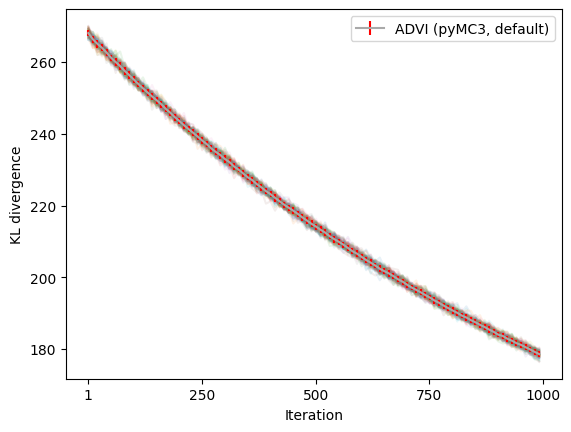

In [5]:
"ADVI (pyMC3, default)",
plt.plot(np.arange(1, 1000, 10), lossesPKLs[0].T, alpha=0.1)
plt.errorbar(x=np.arange(1, 1000, 10), y=lossesPKLs[0].mean(axis=0), yerr=lossesPKLs[0].std(axis=0),
            ecolor="red", label="ADVI (pyMC3, default)", color="darkgray")
plt.legend()
plt.xticks([1, 250, 500, 750, 1000])
plt.xlabel("Iteration")
plt.ylabel("KL divergence")
plt.savefig("ADVI_loss_mf_sonar_1e3_default_config.pdf")

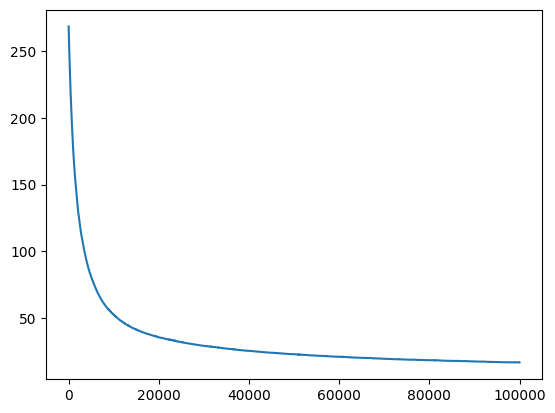

In [20]:
plt.plot(lossesPKLs[0])

In [24]:
PKLs[0]['mean']

array([-1.56930975, -3.18470791, -0.62943212,  3.5999266 , -3.62098086,
        0.59900699,  0.10761738,  2.52182846,  2.97393102, -3.14738373,
        0.08685826, -2.59648879, -4.12931766,  0.33627312,  0.41888361,
        0.59181747,  1.80905674,  1.61480864, -0.68080481, -0.37903398,
       -1.26582191, -0.55058112, -1.36194551, -1.77650416, -2.05964697,
        0.22549361,  0.93554544, -0.44429878,  0.11623802, -1.10793201,
       -2.91805733,  6.16302339, -1.38081081, -1.99657117,  1.14294669,
       -0.29598806,  2.75446119,  4.03134199, -1.30012138, -1.98387269,
        3.78443138,  0.01399023,  0.05187797, -0.90542568, -1.37549337,
       -3.62905259, -1.93198832, -0.15674151, -3.28603858, -4.24964849,
        5.25418785, -1.83566528, -2.46604645, -1.27546949, -2.03728667,
        0.70493676,  0.24909741,  1.18912885, -1.50346082, -0.80083148,
       -0.500217  ])

In [29]:
jnp.diag(PKLs[0]['cov'])

Array([0.11496067, 0.75038528, 0.75364547, 0.80369589, 0.91452865,
       0.59768384, 0.54690798, 0.4781337 , 0.52143968, 0.62210529,
       0.59438902, 0.67389831, 0.63207074, 0.65953026, 0.51191133,
       0.43692965, 0.45131273, 0.42991001, 0.41524073, 0.37866479,
       0.43777871, 0.49503433, 0.50878114, 0.56933879, 0.57163197,
       0.54692715, 0.46444215, 0.43276959, 0.34849121, 0.42105987,
       0.44892053, 0.45213911, 0.47045924, 0.44995866, 0.54926748,
       0.61268555, 0.58330855, 0.52839231, 0.49330705, 0.54499037,
       0.49023236, 0.53717319, 0.61967162, 0.56065386, 0.51715515,
       0.76947861, 0.84275585, 0.80973488, 0.69302817, 0.70122173,
       0.58787421, 0.94516774, 0.80773978, 0.60692334, 0.69434619,
       0.48597739, 0.61793478, 0.47697887, 0.65132819, 0.55488082,
       0.40907714], dtype=float64)

In [ ]:
idx=0
np.savetxt('loss_1e4_advi.csv', np.array([np.arange(1, 1+10000), lossesPKLs[idx]]).T, header='iteration,loss', delimiter=',')

In [ ]:
idx=0
np.savetxt('loss_1e4_advi_skip10.csv', np.array([np.arange(1, 1+1000), lossesPKLs[idx][::10]]).T, header='iteration,loss', delimiter=',')